# Source:

### Origin: 

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

### Creator: 

Harrison, D. and Rubinfeld, D.L. 
'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


# Data Set Information:

Concerns housing values in suburbs of Boston.

# Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in 1000's



In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv('boston_housing_data.csv', sep=',', header=None)
data = data.rename(columns={0:'NaN_col'}).drop('NaN_col', axis=1)
data = data.rename(columns={
                            1:'CRIM', 
                            2:'ZN', 
                            3:'INDUS', 
                            4:'CHAS', 
                            5:'NOX',
                            6:'RM', 
                            7:'AGE',
                            8:'DIS',
                            9:'RAD',
                            10:'TAX',
                            11:'PTRATIO',
                            12:'B',
                            13:'LSTAT',
                            14:'MEDV'
})
data = data.dropna()
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Median house value

In [3]:
median_house_value = np.median(data['MEDV'].dropna())

In [4]:
median_house_value

21.949999999999999

In [5]:
median_house_value = median_house_value * 1000

In [6]:
median_house_value

21950.0

Median House Value = $21,950.00

### Average house value

In [7]:
average_house_value = np.mean(data['MEDV'])

In [8]:
average_house_value

23.750442477876106

In [9]:
average_house_value = average_house_value * 1000

In [10]:
average_house_value

23750.442477876106

Average House Value = $23,750.44

### Median house value of newest houses

In [11]:
newest_suburb = data[data.AGE == min(data['AGE'])]

In [12]:
newest_suburb

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
41,0.12744,0.0,6.91,0.0,0.448,6.77,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6


In [13]:
newest_suburb['MEDV'] * 1000

41    26600.0
Name: MEDV, dtype: float64

#### Assuming the low score is the newest houseing area:

Median value in newest suburn = $26,600.00

### The relationship between per-capita crime rate and the pupil-teacher ratio

In [14]:
bound_to_river = data[data.CHAS == 1]
unbound_to_river = data[data.CHAS == 0]

In [15]:
teacher_ratio_bound = bound_to_river['PTRATIO']
teacher_ratio_unbound = unbound_to_river['PTRATIO']

In [16]:
crime_rate_bound = bound_to_river['CRIM']
crime_rate_unbound = unbound_to_river['CRIM']

In [17]:
unbound = plt.scatter(teacher_ratio_unbound, crime_rate_unbound)
bound = plt.scatter(teacher_ratio_bound, crime_rate_bound)

In [18]:
plt.title('Pupil-Teacher Ratio vs Crime Rate by Town')
plt.legend(handles=[bound, unbound], labels=['Tracks Bound to River', 'Tracks not Bound to River'])
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Per-capita Crime Rate by Town')

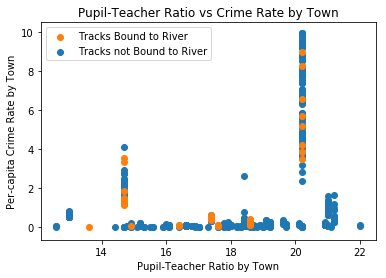

In [19]:
plt.show()

## Conclusion: 

As the number of teachers to pupils goes down, the crime rate seems to climb.  There is a location just above 14:1 and 20:1 where the crime rate peaks drastically.

### Relationship between the proportion of black citizens and the distance to employment centers

In [20]:
plot = plt.scatter(data['B'], data['DIS'])

In [21]:
plt.xlabel('Proportion of Blacks by Town')
plt.ylabel('Weighted Distances to Employment Centres ')
plt.title('Distance to Employment vs Proportion of Black Citizens')

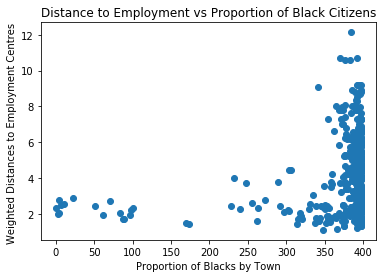

In [22]:
plt.show()

## Conclusion: 

It appears that more blacks are located closer to employemtn centers. There are also a handful of towns that are close to employment centers that have lower numbers of blacks per the population.

### The relationship between median value of owner-occuped homes and nitric oxide concentration along with median home value and the proportion of non-retail business

In [23]:
median_value = data['MEDV']
nitric_oxide = data['NOX']
non_retail = data['INDUS']

In [24]:
plot, data1 = plt.subplots()

In [25]:
data1.scatter(median_value, nitric_oxide, color='blue')

In [26]:
data1.set_xlabel('Median Value of owner-occupied homes in $1000\'s')
data1.set_ylabel('Nitric Oxide Concentration', color='blue')

In [27]:
data2 = data1.twinx()

In [28]:
data2.plot(median_value, non_retail, 'ro')
data2.set_ylabel('Proportion of Non-Retail Business', color='red')

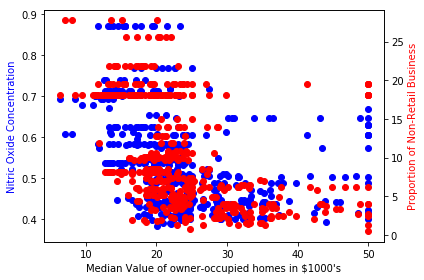

In [29]:
plot.tight_layout()
plt.show()

## Conclusion: 

It appears that nitric oxide levels raise where there are more retail businesses and that house values increase as they get away from these levels.